 <font face="Times New Roman" size="10" style='color:red'><b> <center>Multivariate Linear Regression</font></center></b>

 <font face="Times New Roman" size="5" style='color:black'><b> <center>Dataset Bikesharing Hour</font></center></b>

####  Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis, skew, pearsonr, mode
from statistics import median
import seaborn as sns
import statsmodels.api as sm

#### Note sulle variabili del dataset

1. year (0: 2011, 1:2012)
2. month (da 1 a 12)
3. weekday : giorno della settimana
4. workingday : se il giorno è lavorativo vale 1 altrimenti 0
5. weathersit : 
        - 1: Sereno, Poco nuvoloso (Good)
        - 2: Misto, Nuvoloso (Fair)
        - 3: Poca pioggia, Poca neve, Pioggia + Temporale (bad)
        - 4: Acquazzone, Grandine, Neve + Nebbia (Very bad)
6. temp : Temperatura normalizzata in gradi Celsius
7. atemp: Temperatura percepita normalizzata in gradi Celsius
8. hum: Umidità normalizzata
9. windspeed: Velocità del vento normalizzata


Output:
10. casual: numero di utenti non abituali
11. registered: numero di utenti registrati
12. cnt: somma di tutti i noleggi di tutti gli utenti

## Caricamento del dataset e partizionamento in input e output

In [2]:
bikesharing_full = pd.read_csv('./dataset/Bike-Sharing-Dataset/hour.csv')
bikesharing_hour = pd.read_csv('./dataset/Bike-Sharing-Dataset/hour.csv').drop(
    [
        'instant',
        'dteday',
        'season',
        'yr',
        'mnth',
        'hr',
        'holiday',
        'weekday',
        'workingday',
        'weathersit',
        'casual',
        'registered'
    ], axis=1)#rimosse le variabili non necessarie per la regressione
X = bikesharing_hour.iloc[:, 0:4] #variabili di input
y = bikesharing_hour.iloc[:, 4] # conteggio totale di bikes affittate - output
bikesharing_hour.head()

,temp,atemp,hum,windspeed,cnt
0,0.24,0.2879,0.81,0.0,16
1,0.22,0.2727,0.80,0.0,40
2,0.22,0.2727,0.80,0.0,32
3,0.24,0.2879,0.75,0.0,13
4,0.24,0.2879,0.75,0.0,1


## Analisi esplorativa delle variabili

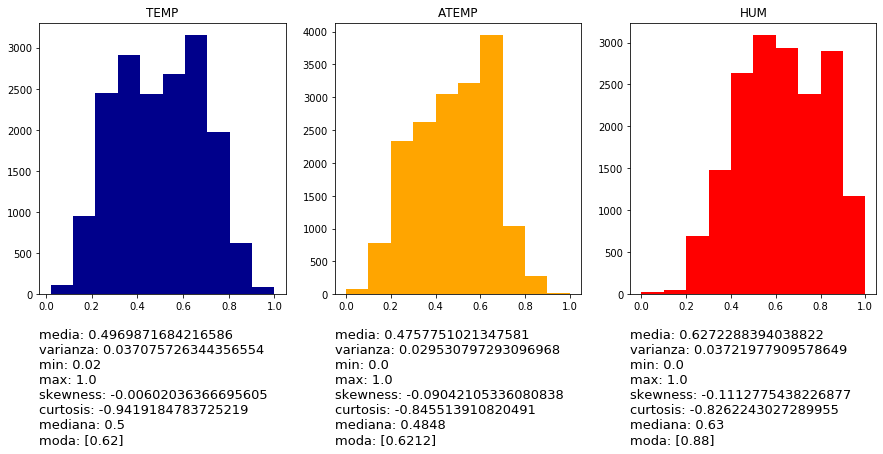

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(X.iloc[:, 0], color='darkblue')
axes[0].set_title('temp'.upper())
axes[0].text(
    0,
    -0.55,
    s='media: {0}\nvarianza: {1}\nmin: {2}\nmax: {3}\nskewness: {4}\ncurtosis: {5}\nmediana: {6}\nmoda: {7}'
    .format(np.mean(X.iloc[:, 0]), np.var(X.iloc[:, 0]),
            np.min(X.iloc[:, 0]), np.max(X.iloc[:, 0]),
            skew(X.iloc[:, 0]), kurtosis(X.iloc[:, 0]),
            median(X.iloc[:, 0]), mode(X.iloc[:, 0])[0]),
    fontsize=13,
    transform=axes[0].transAxes)

axes[1].hist(X.iloc[:, 1], color='orange')
axes[1].set_title('atemp'.upper())
axes[1].text(
    0,
    -0.55,
    s='media: {0}\nvarianza: {1}\nmin: {2}\nmax: {3}\nskewness: {4}\ncurtosis: {5}\nmediana: {6}\nmoda: {7}'
    .format(np.mean(X.iloc[:, 1]), np.var(X.iloc[:, 1]),
            np.min(X.iloc[:, 1]), np.max(X.iloc[:, 1]),
            skew(X.iloc[:, 1]), kurtosis(X.iloc[:, 1]),
            median(X.iloc[:, 1]), mode(X.iloc[:, 1])[0]),
    fontsize=13,
    transform=axes[1].transAxes,
)

axes[2].hist(X.iloc[:, 2], color='red')
axes[2].set_title('hum'.upper())
axes[2].text(
    0,
    -0.55,
    s='media: {0}\nvarianza: {1}\nmin: {2}\nmax: {3}\nskewness: {4}\ncurtosis: {5}\nmediana: {6}\nmoda: {7}'
    .format(np.mean(X.iloc[:, 2]), np.var(X.iloc[:, 2]),
            np.min(X.iloc[:, 2]), np.max(X.iloc[:, 2]),
            skew(X.iloc[:, 2]), kurtosis(X.iloc[:, 2]),
            median(X.iloc[:, 2]), mode(X.iloc[:, 2])[0]),
    fontsize=13,
    transform=axes[2].transAxes)

plt.show()

**Considerazioni**:
1. Nel primo istogramma notiamo una media di circa 0.5 e una varianza di 0.04 circa: quest' ultimo valore indica che i dati non si discostano quadraticamente rispetto alla media aritmetica; la stessa peculiarità la possiamo notare anche all'interno degli altri due istogrammi
2. Il valore della *skewness*, che misura la asimmetria della distribuzione attorno al suo valore d'attesa, è negativo in tutti i grafici: questo indica la presenza di code verso sinistra
3. La curtosi misura la rapidità con cui le code della distribuzione si annullano: notiamo che essa è negativa in tutti i grafici, ciò indica che la curva è platicurtica, cioè più piatta di una normale
4. I valori delle *mediane* non coincidono mai con quelli delle *medie*

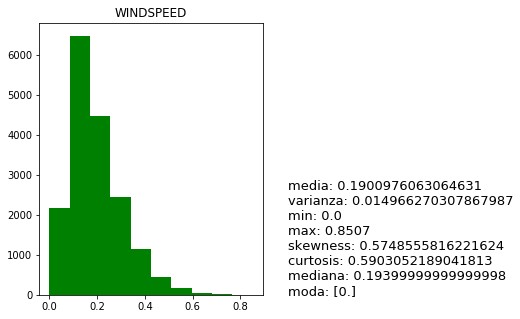

In [4]:
plt.figure(figsize=(4, 5))
plt.hist(X.iloc[:, 3], color='green')
plt.title('windspeed'.upper())
plt.text(
    1,
    -0,
    s='media: {0}\nvarianza: {1}\nmin: {2}\nmax: {3}\nskewness: {4}\ncurtosis: {5}\nmediana: {6}\nmoda: {7}'
    .format(np.mean(X.iloc[:, 3]), np.var(X.iloc[:, 3]), np.min(X.iloc[:, 3]),
            np.max(X.iloc[:, 3]), skew(X.iloc[:, 3]), kurtosis(X.iloc[:, 3]),
            median(X.iloc[:, 3]),
            mode(X.iloc[:, 3])[0]),
    fontsize=13)

plt.show()

**Considerazioni**:
1. Nel primo istogramma notiamo una media di circa 0.19 e una varianza di 0.015 circa: quest' ultimo valore indica che i dati non si discostano quadraticamente rispetto alla media aritmetica
2. Il valore della *skewness*, che misura la asimmetria della distribuzione attorno al suo valore d'attesa, è positivo in questo istogramma: questo indica la presenza di coda verso destra
3. La curtosi misura la rapidità con cui le code della distribuzione si annullano, allontanandosi dal valor medio: notiamo che essa è positiva, ciò indica che la curva è *leptocurtica*, cioè più appuntita di una normale
4. Il valore della *mediana* è coincidente con quello della *media*

## Osservazioni sul dataset

### Noleggio di biciclette al variare della temperatura

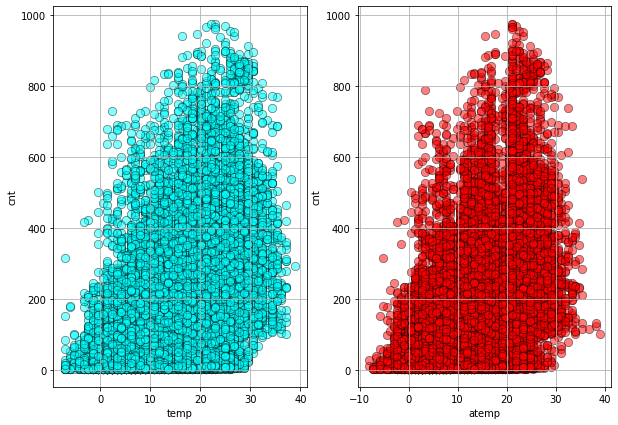

In [5]:
plt.figure(figsize=[10, 7])

plt.subplot(1, 2, 1)
plt.xlabel('temperatura')
plt.ylabel('numero di noleggi')
temp = X['temp'].map(lambda x: x * (47) - 8)
sns.scatterplot(temp,
                y, 
                alpha=.5, 
                color='cyan',
                edgecolor='black', 
                s=70)
plt.grid()

plt.subplot(1, 2, 2)
plt.xlabel('temperatura percepita')
plt.ylabel('numero di noleggi')
temp_percepita = X['atemp'].map(lambda x: x * (47) - 8)
sns.scatterplot(temp_percepita,
                y,
                alpha=.5,
                color='red',
                edgecolor='black',
                s=70)
plt.grid()
plt.show()

**Considerazioni:**
- Nel caso di entrambe le misure di temperatura che sono la temperatura in gradi Celsius e la temperatura percepita(sempre in gradi Celsius), la relazione con il numero di noleggi di biciclette sembra essere molto simile. Possiamo notare come le due variabili siano molto correlate tra di loro, ma questo è ovvio, in quanto la differenza fra le due temperature è molto piccola.
+ Potremmo già pensare che tale variabile sia utilizzabile nella *regressione*, ma considereremo una delle due in quanto si nota già una forte correlazione.

### Noleggio di biciclette sulla base della velocità del vento

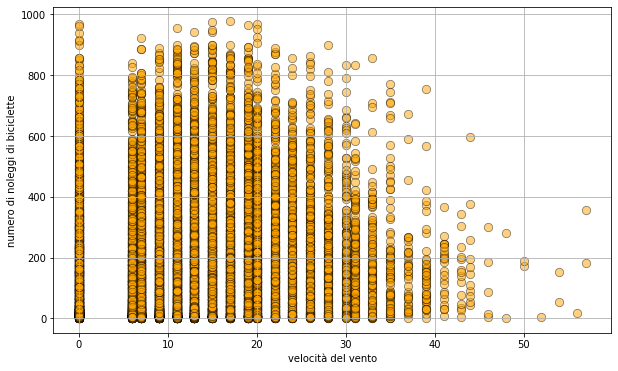

In [6]:
plt.figure(figsize=[10, 6])
sns.scatterplot(X['windspeed'] * 67, y, alpha=0.5, color='orange', edgecolor='black', s=70)
plt.xlabel('velocità del vento')
plt.ylabel('numero di noleggi di biciclette')

plt.grid()
plt.show()

**Considerazioni**:
- Maggiore è la velocità del vento minore è il noleggio di biciclette. Possiamo ipotizzare, come nel caso della temperatura, che questa variabile possa essere utilizzata durante la fase di modellazione.

### Noleggio di biciclette sulla base dell' umidità

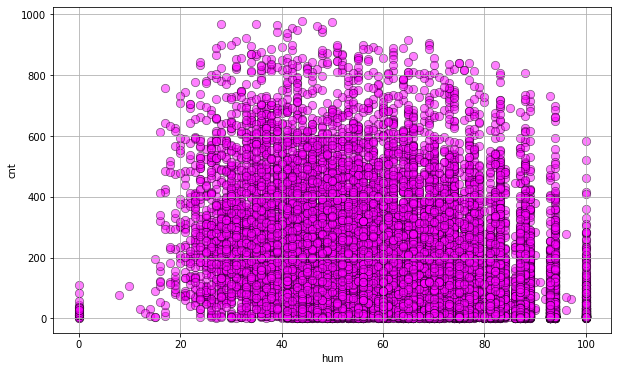

In [7]:
plt.figure(figsize=[10, 6])
plt.xlabel('umidità')
plt.ylabel('numero di noleggi di biciclette')
sns.scatterplot(X['hum'] * 100,
                y,
                color='magenta',
                alpha=0.5,
                edgecolor='black',
                s=70)
plt.grid()
plt.show()

**Considerazioni**:
- La relazione tra umidità dell'aria e il noleggio biciclette non è lineare.
- Piuttosto, abbiamo una situazione in cui sia l'umidità bassa che quella alta possono essere associate a un minor numero di noleggi di biciclette con il picco di noleggi nel mezzo.

### Analisi delle variabili discrete

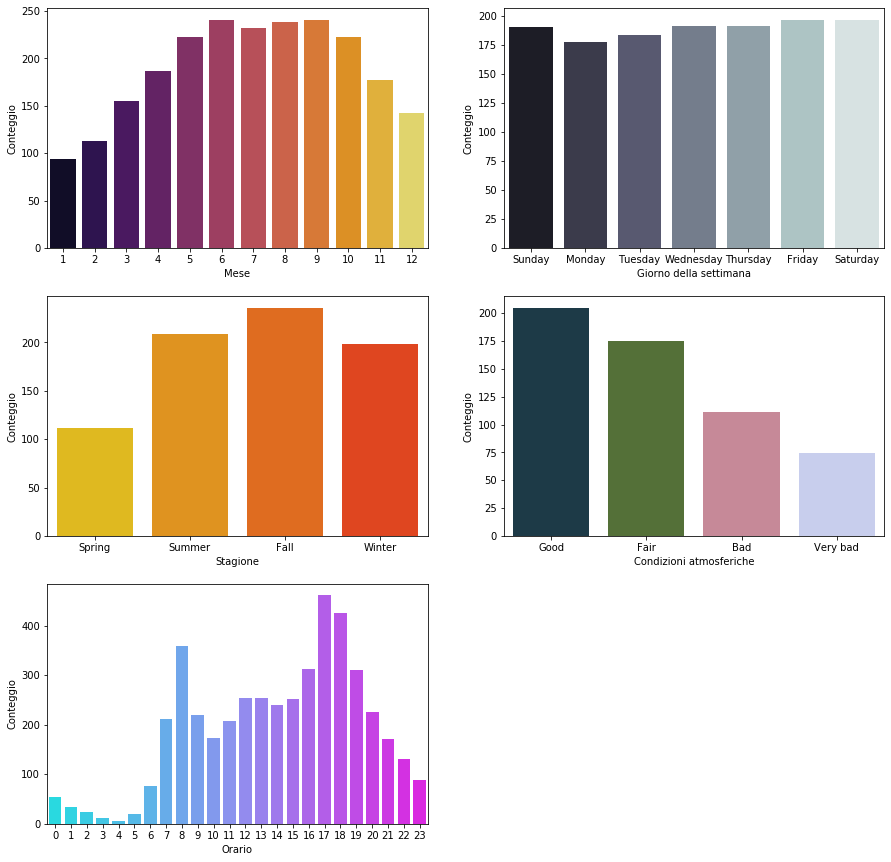

In [8]:
days_of_week = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

season_list = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

weather_sit = {1: 'Good', 2: 'Fair', 3: 'Bad', 4: 'Very bad'}

month = bikesharing_full.loc[:, 'mnth']
weekday = bikesharing_full.loc[:, 'weekday'].map(days_of_week)
season = bikesharing_full.loc[:, 'season'].map(season_list)
weathersit = bikesharing_full.loc[:, 'weathersit'].map(weather_sit)
hour = bikesharing_full.loc[:, 'hr']
y = bikesharing_full.iloc[:, -1]

fig = plt.figure(figsize=[15, 15])
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(3, 2, 1)
sns.barplot(month, y, palette="inferno", ax=ax, ci=None)
plt.xlabel("Mese")
plt.ylabel("Conteggio")

ax = fig.add_subplot(3, 2, 2)
sns.barplot(weekday, y, palette="bone", ax=ax, ci=None)
plt.xlabel("Giorno della settimana")
plt.ylabel("Conteggio")

ax = fig.add_subplot(3, 2, 3)
sns.barplot(season, y, palette="autumn_r", ax=ax, ci=None)
plt.xlabel("Stagione")
plt.ylabel("Conteggio")

ax = fig.add_subplot(3, 2, 4)
sns.barplot(weathersit, y, palette="cubehelix", ax=ax, ci=None)
plt.xlabel("Condizioni atmosferiche")
plt.ylabel("Conteggio")

ax = fig.add_subplot(3, 2, 5)
sns.barplot(hour, y, palette="cool", ax=ax, ci=None)
plt.xlabel("Orario")
plt.ylabel("Conteggio")

plt.show()

**Considerazioni:**
- Osserviamo che la quantità di noleggi effettuati non sembra essere influenzata dal giorno della settimana, infatti il grafico ci appare molto piatto e non ci dà molte informazioni a riguardo
- Notiamo però, la presenza di alcuni fattori che influenzano il numero di noleggi, ed uno di questi sembra essere il periodo dell'anno. Infatti, si preferisce utilizzare la bicicletta durante i mesi centrali dell'anno (essendo quelli più caldi e con meno giornate di pioggia)
- Il grafico che indica la situazione del meteo (sereno, piovoso, ecc...) ci rivela di come si è più invogliati ad utilizzare la bici durante le giornate più soleggiate
- Infine, dal grafico su base oraria si può evincere che gli orari più gettonati coincidano con quelli di andata e ritorno dal lavoro (8:00 - 17.00/18.00)

Tuttavia si tratta di una analisi molto sommaria in cui non è presente un grande livello di dettaglio; infatti effettuando una analisi più approfondita si potrebbero scoprire delle correlazioni fra il mese specifico ed i giorni della settimana, o altre ancora più interessanti.

## Analisi della correlazione fra le variabili

### Heatmap

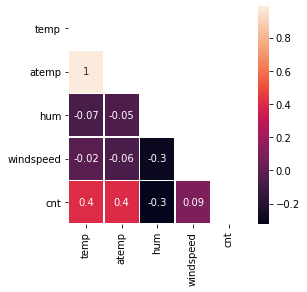

In [9]:
fig, ax = plt.subplots(figsize=(4,4))
mask = np.triu(bikesharing_hour.corr())
sns.heatmap(bikesharing_hour.corr(),
            annot=True,
            fmt='.1g',
            mask=mask,
            ax=ax,
            linecolor='white',
            linewidths=0.5,
            )
plt.show()

**Considerazioni**:
1. Possiamo notare che le variabli *temp* e *atemp* sono dipendenti fra loro
2. La correlazione più alta della variabile *cnt* la abbiamo con *temp* e *atemp*, a seguire *hum* 
3. Per quanto riguarda la variabile *windspeed*, possiamo **non utilizzarla** nel modello di regressione lineare in quanto poco esplicativa, con un valore di correlazione molto basso (*0.09*)

### Selezione delle features sulla base della matrice di correlazione 

In [10]:
pd.DataFrame(bikesharing_hour.corr().iloc[:-1, -1].abs()).where(
    lambda x: x > 0.2).dropna().style.background_gradient(cmap='winter')

,cnt
temp,0.404772
atemp,0.400929
hum,0.322911


**Considerazioni**
1. Non tutte le variabili sono linearmente correlate con la variabile di output (*cnt*) e perciò potremmo avere una qualità della stima piuttosto bassa, qualora introducessimo tutte le variabili per la regressione.
2. Abbiamo scelto una soglia di **0.2**, in modo da scegliere solo le features più **significative** 

## Regressione Multipla 

### Partizionamento in Training Set e Test Set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                    test_size = 0.3,
                    random_state=0)

### Regressione con una sola variabile (temp)

In [12]:
from sklearn.metrics import r2_score

x1 = X_train.iloc[:, 0]
N = x1.shape
A_1 = np.column_stack((np.ones(N), x1))
alpha = np.linalg.solve(A_1.T @ A_1, A_1.T @ y_train)
y_train_pred_one = A_1.dot(alpha)
residuo_uno_train = np.linalg.norm(y_train - y_train_pred_one)
print('Residuo regressione su Training Set a una variabile\f',
      residuo_uno_train**2)

y_test_regr_one = alpha[0] + alpha[1] * (X_test.iloc[:, 0])
print('Residuo regressione su Test Set a una variabile    ',
      np.linalg.norm(y_test - y_test_regr_one)**2)
print('\nr2_score sul train a una variabile',
      r2_score(y_train, y_train_pred_one))
print('r2_score sul test a una variabile ', r2_score(y_test, y_test_regr_one))

Residuo regressione su Training Set a una variabile 335204883.85116774
Residuo regressione su Test Set a una variabile     142894644.14151365

r2_score sul train a una variabile 0.16092077409084482
r2_score sul test a una variabile  0.1705132865986959


### Regressione con due variabili (temp e humidity)

**Nota**: In questo caso abbiamo bisogno dell' R^2 adjusted per il calcolo della bontà del modello, in quanto si tratta di una regressione lineare bivariata

In [1]:
def r_2_adjusted(r, n, p):
    return (1 - (1 - r) * ((n - 1) / 
          (n - p - 1)))

$$\overline{R}^2 = 1 - (1 - R^2)\frac{n - 1}{n - p - 1}$$

In [14]:
#con due variabili (temp e hum)
x2 = X_train.iloc[:, 2]
N = x1.shape
A_2 = np.column_stack((np.ones(N), x1, x2))
alpha = np.linalg.solve(A_2.T @ A_2, A_2.T @ y_train)
y_train_pred_two = A_2.dot(alpha)
residuo_due_train = np.linalg.norm(y_train - y_train_pred_two)
print('Residuo regressione su Training Set a due variabili\f',
      residuo_due_train**2)

y_test_regr_two = alpha[0] + alpha[1] * (X_test.iloc[:, 0]) + alpha[2] * (
    X_test.iloc[:, 2])
print('Residuo regressione su Test Set a due variabili    ',
      np.linalg.norm(y_test - y_test_regr_two)**2)


r2_score_train_2 = r2_score(y_train, y_train_pred_two)
r2_score_test_2 = r2_score(y_test, y_test_regr_two)

print('\nr2_score adjusted sul train a due variabili',
      r_2_adjusted(r2_score_train_2, A_2.shape[0], A_2.shape[1]))
print('r2_score adjusted sul test a due variabili',
      r_2_adjusted(r2_score_test_2, A_2.shape[0], A_2.shape[1]))

Residuo regressione su Training Set a due variabili 301071563.28725386
Residuo regressione su Test Set a due variabili     127168530.91416173

r2_score adjusted sul train a due variabili 0.2461768129226959
r2_score adjusted sul test a due variabili 0.26161943008548827


## Analisi esplorativa dei residui

#### Istogrammi per la ricerca della *normalità* dei residui (Training Set) 

- Questo ci permette di verificare l' **assunzione** che giustifica l'uso del modello di regressione lineare 

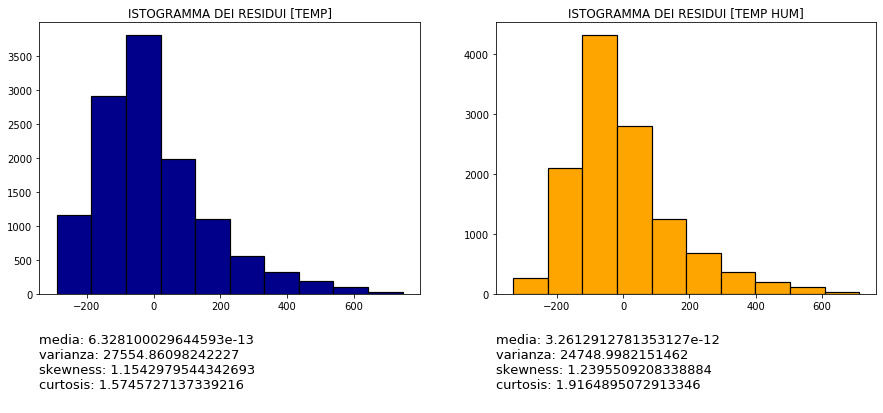

In [17]:
residuo_1 = y_train - y_train_pred_one
residuo_2 = y_train - y_train_pred_two

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].hist(residuo_1, color='darkblue',edgecolor='black', linewidth=1.2)
axes[0].set_title('Istogramma dei residui [temp]'.upper())
axes[0].text(
    0,
    -0.40,
    s='media: {0}\nvarianza: {1}\nskewness: {2}\ncurtosis: {3}\n'
    .format(np.mean(residuo_1), np.var(residuo_1),
            skew(residuo_1), kurtosis(residuo_1)),
    fontsize=13,
    transform=axes[0].transAxes)

axes[1].hist(residuo_2, color='orange',edgecolor='black', linewidth=1.2)
axes[1].set_title('Istogramma dei residui [temp hum]'.upper())
axes[1].text(
    0,
    -0.40,
    s='media: {0}\nvarianza: {1}\nskewness: {2}\ncurtosis: {3}\n'
    .format(np.mean(residuo_2), np.var(residuo_2),
            skew(residuo_2), kurtosis(residuo_2)),
    fontsize=13,
    transform=axes[1].transAxes,
)

plt.show()


**Considerazioni**:
1. Dall'analisi degli istogrammi possiamo notare la quasi assenza di somiglianza ad una normale. Notiamo con evidenza, la presenza di *skewness* positiva nei residui, con la conseguente presenza di una coda code a destra e quindi di una asimmetria dei residui in tutti e tre i casi
2. Inoltre, anche la *curtosi* indica la presenza di valori lontani dalla media 
3. A conferma della considerazione numero 2), la varianza dei residui è molto alta, quindi questo indica che i residui si allontanano molto dal valore medio
4. Il modello di regressione lineare per questo specifico dataset *già* ci appare *pessimo* 

#### Scatter plot per la ricerca della *omoschedasticità* dei residui (Training Set)

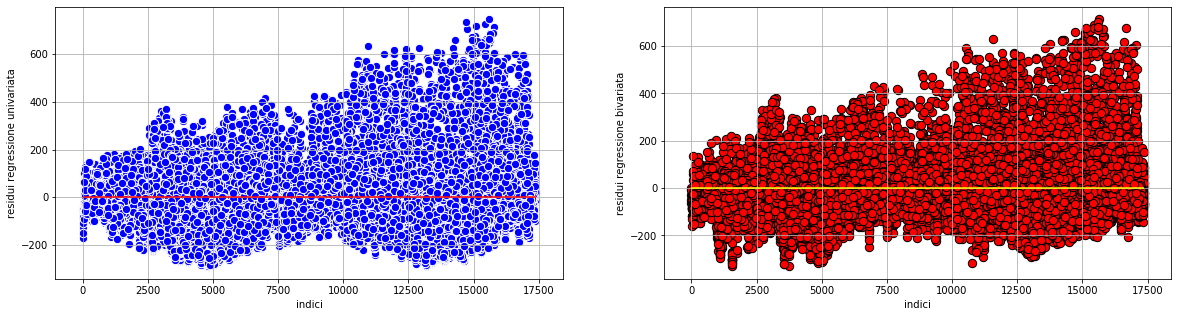

In [19]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
plt.xlabel('indici') 
plt.ylabel('residui regressione univariata') 
plt.hlines(0,0,X.shape[0], color='red')
plt.scatter(X_train.index,
            residuo_1,
            color='blue',
            marker='o',
            edgecolor='white',
            s=70)

plt.grid()
plt.subplot(1, 2, 2)
plt.xlabel('indici') 
plt.ylabel('residui regressione bivariata') 
plt.hlines(0,0,X.shape[0], color='yellow')
plt.scatter(X_train.index,
            residuo_2,
            color='red',
            marker='o',
            edgecolor='black',
            s=70)

plt.grid()
plt.show()

**Considerazioni**:
- I residui appaiono notevolmente **eteroschedastici** già sul training set

#### Istogrammi per la ricerca della *normalità* dei residui (Test Set)

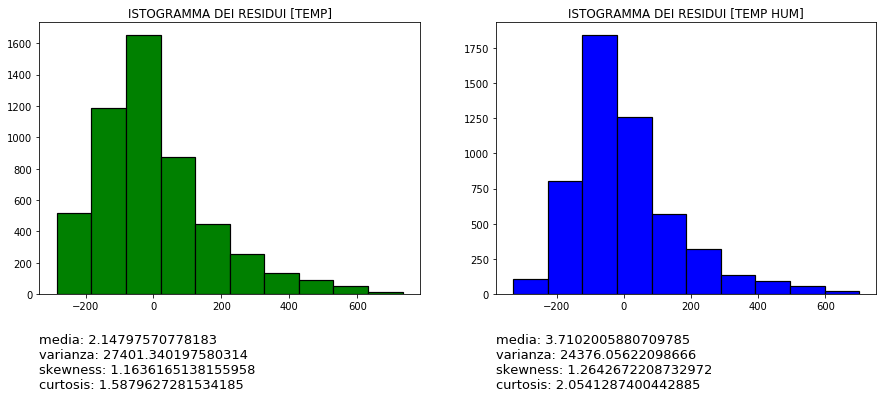

In [21]:
residuo_1 = y_test - y_test_regr_one
residuo_2 = y_test - y_test_regr_two

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].hist(residuo_1, color='green',edgecolor='black', linewidth=1.2)
axes[0].set_title('Istogramma dei residui [temp]'.upper())
axes[0].text(
    0,
    -0.40,
    s='media: {0}\nvarianza: {1}\nskewness: {2}\ncurtosis: {3}\n'
    .format(np.mean(residuo_1), np.var(residuo_1),
            skew(residuo_1), kurtosis(residuo_1)),
    fontsize=13,
    transform=axes[0].transAxes)

axes[1].hist(residuo_2, color='blue',edgecolor='black', linewidth=1.2)
axes[1].set_title('Istogramma dei residui [temp hum]'.upper())
axes[1].text(
    0,
    -0.40,
    s='media: {0}\nvarianza: {1}\nskewness: {2}\ncurtosis: {3}\n'
    .format(np.mean(residuo_2), np.var(residuo_2),
            skew(residuo_2), kurtosis(residuo_2)),
    fontsize=13,
    transform=axes[1].transAxes,
)

plt.show()


**Considerazioni**:
1. Anche nel training set, la varianza dei residui è molto alta, indicando un alto valore della misura di quanto essi si discostino quadraticamente rispettivamente dalla media aritmetica 
2. La **skewness** è anche qui positiva e maggiore di uno: notiamo la presenza di una coda a destra 
3. La **curtosi** è anch'essa positiva, quindi la forma della ditribuzione degli errori appare essere *leptocurtica*


#### Scatter plot per la ricerca della *omoschedasticità* dei residui (Test Set)

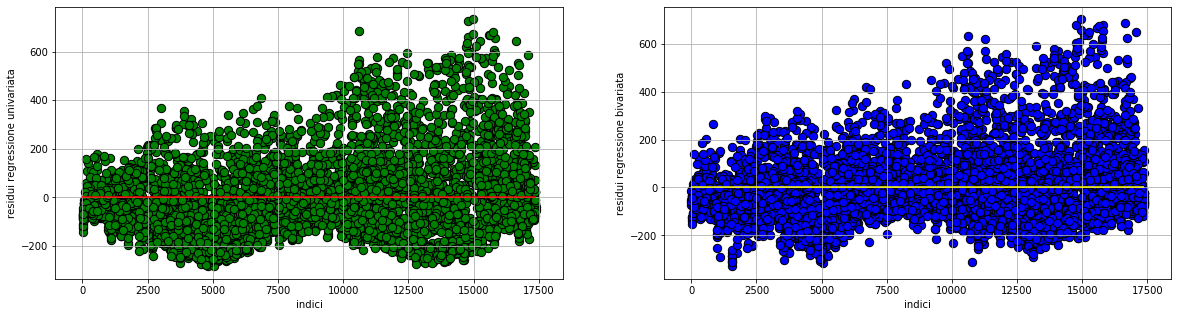

In [27]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
plt.xlabel('indici') 
plt.ylabel('residui regressione univariata') 
plt.hlines(0,0,X.shape[0], color='red')
plt.scatter(X_test.index,
            residuo_1,
            color='green',
            marker='o',
            edgecolor='black',
            s=70)

plt.grid()
plt.subplot(1, 2, 2)
plt.xlabel('indici') 
plt.ylabel('residui regressione bivariata') 
plt.hlines(0,0,X.shape[0], color='yellow')
plt.scatter(X_test.index,
            residuo_2,
            color='blue',
            marker='o',
            edgecolor='black',
            s=70)
plt.grid()
plt.show()

**Considerazioni**
- Anche qui possiamo confermare la presenza di **eteroschedasticità** nei residui

**Riepilogo assunzioni sul Test Set**:
- Sicuramente, poichè dall'analisi dei residui abbiamo osservato la violazione dei requisiti di *omoschedasticità* e di *normalità*, possiamo riconfermare che il modello di regressione lineare multipla è **pessimo** per il dataset utilizzato. Tali risultati sono già evidenti dalla fase di *training*.